In [172]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [173]:
%%time
# Load BES Panel for Wave 8
parsed_data = pd.read_pickle("man_of_2017_parsed.pkl")
#(31409, 733)

# BES_Panel = pd.read_stata("../BES_analysis_data/BES2015_W8_v1.6.dta")

print( parsed_data.shape )

(313, 83)
Wall time: 10 ms


In [174]:
numerics_only = pd.DataFrame()
for col in parsed_data.columns:
    # drop object and datetime64[ns] silently
    if str( parsed_data[col].dtype ) == 'category':
        numerics_only[col] = parsed_data[col].cat.codes.astype('float')
    elif ( str( parsed_data[col].dtypes ) == 'bool') | ( str( parsed_data[col].dtypes ) == 'int64' ) :
        numerics_only[col] = parsed_data[col].astype('float')


In [175]:
non_ordinal = [ "how_would_you_describe_your" , "where_do_you_live" ]
pol_identity = parsed_data.columns[parsed_data.dtypes==bool]

In [176]:
parsed_data[ parsed_data.columns[parsed_data.dtypes==bool] ].sum()

socialist                163
liberal                  181
feminist                 210
egalitarian              105
libertarian               36
anarchist                 24
moderate                 104
conservative              25
men_s_rights_activist     10
dtype: int64

In [177]:
temp = StandardScaler().fit_transform( numerics_only )
man_std = pd.DataFrame(temp,
                       columns = numerics_only.columns,
                       index   = numerics_only.index)
# man_std.drop(non_ordinal, axis=1,inplace=True)
# man_std.drop(pol_identity, axis=1,inplace=True)

In [178]:
# man_std.hist(figsize=(30,30))

(313, 10)
explained variance ratio (first two components): [ 0.15913563  0.07136959  0.0343961   0.02917577  0.0275431   0.02474042
  0.02339172  0.02286419  0.02022189  0.01977616]


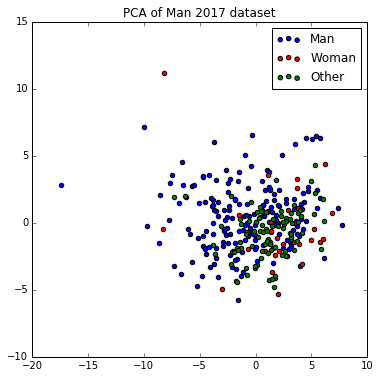

In [179]:
# Leave = BES_std["euRefVote"]>0
# Stay =  BES_std["euRefVote"]<0

pca = PCA(n_components=10)
X_r = pca.fit(man_std).transform(man_std)

print( X_r.shape )

print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_) )

plt.figure(figsize=(6,6))
#plt.scatter( X_r[:, 0 ] ,X_r[:, 1 ] )

# Male, Female, Other
colour_array = ['b','r','g']
label_array = ["Man", "Woman", "Other"]
numerics_only["how_would_you_describe_your"]

for y in [0.0, 1.0, 2.0]:
    plt.scatter(X_r[ np.ix_(numerics_only["how_would_you_describe_your"]== y, [0]) ],
                X_r[ np.ix_(numerics_only["how_would_you_describe_your"] ==y, [1]) ],
                c    = colour_array[int(y)],
                label = label_array[int(y)] )
# plt.scatter( X_r[ np.ix_(Leave, [0]) ] , X_r[ np.ix_(Leave, [1]) ], c='r', label="Leave" )
# plt.scatter( X_r[ np.ix_(Stay , [0]) ] , X_r[ np.ix_(Stay , [1]) ], c='b', label="Stay"  )

plt.legend()
plt.title('PCA of Man 2017 dataset')
plt.show()

,0,1
32,-0.182439,maintains_his_physical_strength
27,-0.173575,is_quick_to_respond_in_a_time
12,-0.161612,is_willing_to_endure_suffering
30,-0.160672,cultivates_practical_skills_and
10,-0.159969,may_take_a_beating_of_whatever
18,-0.157457,speaks_his_mind
61,-0.157364,does_not_let_his_feelings_cloud
34,-0.157074,has_a_plan_to_get_or_do_what_it
20,-0.153993,is_financially_independent
63,-0.153152,is_ready_to_use_physical_force


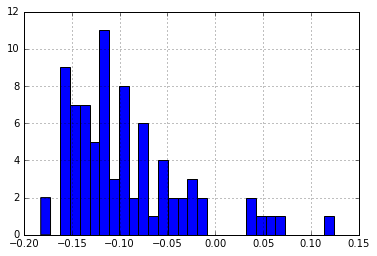

In [180]:
comp_0 = pd.DataFrame([ pca.components_[0], man_std.columns ]).T
comp_0[0].hist(bins=30)
# comp_0_vars = comp_0[comp_0[0].abs()>.12].sort_values(by=0).index
comp_0[comp_0[0].abs()>.04].sort_values(by=0)

,0,1
8,-0.244055,uses_his_wealth_and_social
66,-0.23999,helps_other_men_to_be_good_men
25,-0.23383,seeks_advice_when_he_wants_to
7,-0.21253,appreciates_beauty_in_all_of
64,-0.187605,cherishes_and_values_the
17,-0.176208,shows_sportsmanship_and_does
67,-0.158555,does_not_speak_ill_of_others
72,-0.153231,feminist
37,-0.152462,does_not_lie
9,-0.144241,does_what_he_says_he_will_do


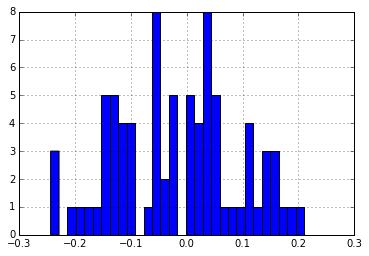

In [181]:
comp_1 = pd.DataFrame([ pca.components_[1], man_std.columns ]).T
comp_1[0].hist(bins=30)
comp_1_vars = comp_1[comp_1[0].abs()>.09].sort_values(by=0).index
comp_1[comp_1[0].abs()>.09].sort_values(by=0)